<a href="https://colab.research.google.com/github/juliparedes1/Proyecto-programacion-1-TUIA/blob/main/Copia_de_Proyecto_Programaci%C3%B3n_copia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Trabajo Práctico: La Gran Prueba de Sabor**

# **Presentación**



**Una consultora** ha sido contratada para realizar un **análisis de mercado** y **proporcionar recomendaciones estratégicas** para la apertura de una cafetería en EE.UU.  

Se le solicitó llevar a cabo un estudio utilizando los datos de la encuesta [**"La Gran Prueba de Sabor"**](https://raw.githubusercontent.com/rfordatascience/tidytuesday/refs/heads/main/data/2024/2024-05-14/coffee_survey.csv), con el fin de extraer información sobre las preferencias de los consumidores y ayudar al grupo inversor a diseñar una estrategia informada para su incursión en el sector. Esta encuesta la realizó el famoso barista *James Hoffmann* en octubre de 2023, durante una transmisión en vivo con unas *4.000 personas* en Estados Unidos.

#**Objetivo del Proyecto Final**

En este Proyecto Final, el alumno asumirá el rol de consultor y aplicará todos los conocimientos adquiridos en la materia. Deberá demostrar un uso adecuado de los elementos y construcciones del lenguaje de programación mediante la lectura, manipulación y análisis de los datos de la encuesta, así como proporcionar información útil para el inversor.

#**Consignas**


## **Etapa 0.**
**Conociendo los datos**


**1-** Descargar el archivo de la encuesta ejecutando el código que se propone a continuación.

**2-** Una vez descargado el archivos analice su contenido. ¿Qué información brinda de cada persona encuestada? ¿Todos los encuestados respondieron a todas las preguntas?  

In [1]:
#No modificar este código que le permitirá bajar el archivo que necesita para trabajar

import requests

url_coffee_survey = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/refs/heads/main/data/2024/2024-05-14/coffee_survey.csv"
archivo_salida_coffee_survey = "coffee_survey.csv"

def descargarCSV(url, archivo_salida):
    print("Descargando archivo...")
    consulta = requests.get(url)
    contenido = consulta.content

    print("Guardando archivo...")
    # Abrir conexion en modo escritura
    with open(archivo_salida, "w", encoding="utf-8") as archivo:
        # Escribir el contenido de la consulta
        archivo.write(contenido.decode("utf-8"))

    print("¡Archivo descargado con éxito!")

descargarCSV(url_coffee_survey,archivo_salida_coffee_survey)


Descargando archivo...
Guardando archivo...
¡Archivo descargado con éxito!


## **Etapa 1.**
**Analizando las respuestas**

**3-** Analice la columna *'age'* que indica el rango de edad del encuestado. ¿Qué cantidad de los encuestados que brindaron esta información pertenecen a los rangos *'<18 years old'*, *'18-24 years old'*, *'25-34 years old'*, *'35-44 years old'*, *'45-54 years old'*, *'55-64 years old'* y *'>65 years old'*, respectivamente? Para responder a esta pregunta implemente una función **contar_rangos_edad** que reciba el nombre del archivo de datos de la encuesta y devuelva un diccionario que le ayude a contar la cantidad de respuestas de cada rango etario.

In [2]:
import csv

# Defina una función que le sirva para manipular los datos del archivo

# Consigna 3: Analizar la columna 'age'

def contar_rangos_edad(nombre_archivo) -> dict[str, int]:
    conteo = {
        "<18 years old": 0,
        "18-24 years old": 0,
        "25-34 years old": 0,
        "35-44 years old": 0,
        "45-54 years old": 0,
        "55-64 years old": 0,
        ">65 years old": 0
    }

    archivo = open(nombre_archivo, "r", encoding="utf-8")  # Abrimos el archivo
    lector = csv.reader(archivo)
    next(lector)

    for fila in lector:
        edad = fila[1]
        if edad == "NA":
            continue
        else:
            conteo[edad] += 1

    archivo.close()

    return conteo

# Prueba
print("Conteo de rangos de edad:", contar_rangos_edad("coffee_survey.csv"))

#Respuesta:
#Conteo de rangos de edad: {'18-24 years old': 461, '25-34 years old': 1986, '35-44 years old': 960, '55-64 years old': 187, '<18 years old': 20, '>65 years old': 95, '45-54 years old': 302}


Conteo de rangos de edad: {'<18 years old': 20, '18-24 years old': 461, '25-34 years old': 1986, '35-44 years old': 960, '45-54 years old': 302, '55-64 years old': 187, '>65 years old': 95}


**4-** Analice la columna *'where_drink'* que indica dónde toman café los encuestados. ¿Qué diferencia encuentra entre esta columna de la anterior? ¿Qué cantidad de los encuestados que respondieron a esta pregunta toman el café *'On the go'*, *'At a cafe'*, *'At the office'*, *'At home'*, *'None of these'*, respectivamente?  Para responder a esta pregunta implemente una función **contar_lugares_consumo** que reciba el nombre del archivo de datos de la encuesta y devuelva un diccionario que le ayude a contar la cantidad de respuestas de cada lugar de consumo.

In [33]:
import csv

# Consigna 4: Analizar la columna 'where_drink'

def contar_lugares_consumo(nombre_archivo) -> dict[str,int]:
  archivo = open(nombre_archivo, mode="r") #apertura y lectura del archivo
  lector = csv.reader(archivo)
  conteo = {}
  next(lector)

  for fila in lector:

    lugares = fila[3]
    if lugares == "NA":

      continue
    else:

      lista_lugares = lugares.split(", ")
      for individual in lista_lugares:

         conteo[individual] = conteo.get((individual), 0) + 1
  archivo.close() #cerramos el archivo .csv



  #completar para responder a la consigna

  return conteo


# Prueba
print("Conteo de lugares de consumo:", contar_lugares_consumo("coffee_survey.csv"))

#Respuesta:
#Conteo de lugares de consumo: {'On the go': 705, 'At a cafe': 1170, 'At the office': 1430, 'At home': 3644, 'None of these': 36}


Conteo de lugares de consumo: {'At a cafe': 1170, 'At the office': 1430, 'At home': 3644, 'On the go': 705, 'None of these': 36}


**5-** Analicen los códigos propuestos para responder a las consignas **3** y **4**. Son similares, ¿verdad? Proponga una función **procesamiento_columna**, que recibiendo el nombre del archivo y el nombre de la columna a analizar, sirva para resolver los dos casos anteriores. La función debe devolver un diccionario con las cantidades asociadas a cada uno de los valores posibles de las respuestas brindadas por los encuestados.


In [32]:
# Consigna 5: Función procesamiento_columna
def procesamiento_columna(nombre_archivo: str, columna:str) -> dict[str,int]:
  """
   segun el nombre de la columna que elijas, genera un diccionario el cual cuenta las diferentes opciones que existen
   e ignora las NA
  """
  archivo = open(nombre_archivo, mode="r") #apertura y lectura del archivo
  lector = csv.reader(archivo)
  conteo = {}
  atributos = next(lector)
  indice = int(atributos.index(columna))
  for consumidores in lector:
    if consumidores[indice].split(", ") != 1:
      for dato_separado in  consumidores[indice].split(", "):
        if dato_separado == "NA":
          continue
        else:
         conteo[dato_separado] =  conteo.get(dato_separado , 0) + 1
    else:
      if conteo[consumidores[indice]] == "NA":
        continue
      else:
       conteo[consumidores[indice]]  = conteo.get(consumidores[indice], 0) + 1
#completar para responder a la consigna
  return conteo

# Prueba
print("Conteo de rangos de edad:", procesamiento_columna("coffee_survey.csv","age"))
print("Conteo de lugares de consumo:", procesamiento_columna("coffee_survey.csv","favorite"))

#Respuestas:
#Conteo de rangos de edad: {'18-24 years old': 461, '25-34 years old': 1986, '35-44 years old': 960, '55-64 years old': 187, '<18 years old': 20, '>65 years old': 95, '45-54 years old': 302}
#Conteo de lugares de consumo: {'At a cafe': 1170, 'At the office': 1430, 'At home': 3644, 'On the go': 705, 'None of these': 36}


Conteo de rangos de edad: {'18-24 years old': 461, '25-34 years old': 1986, '35-44 years old': 960, '55-64 years old': 187, '<18 years old': 20, '>65 years old': 95, '45-54 years old': 302}
Conteo de lugares de consumo: {'Regular drip coffee': 442, 'Iced coffee': 156, 'Latte': 680, 'Pourover': 1084, 'Other': 114, 'Cortado': 312, 'Cappuccino': 341, 'Espresso': 330, 'Cold brew': 109, 'Americano': 249, 'Mocha': 118, 'Blended drink (e.g. Frappuccino)': 45}






**6-** Pruebe la función anterior, analizando las columnas *'cups'* y *'brew'*. ¿Funciona?

In [31]:

# Prueba

print("Conteo de cups:", procesamiento_columna("coffee_survey.csv","cups"))
print("Conteo de brew:", procesamiento_columna("coffee_survey.csv","brew"))

#Respuestas esperadas:
#Conteo de cups: {'Less than 1': 348, '2': 1663, '1': 1277, '3': 473, 'More than 4': 67, '4': 121}
#Conteo de brew: {'Pod/capsule machine (e.g. Keurig/Nespresso)': 336, 'Bean-to-cup machine': 84, 'Coffee brewing machine (e.g. Mr. Coffee)': 663, 'Pour over': 2295, 'Espresso': 1518, 'French press': 735, 'Instant coffee': 130, 'Other': 677, 'Coffee extract (e.g. Cometeer)': 186, 'Cold brew': 525}


Conteo de cups: {'Less than 1': 348, '2': 1663, '1': 1277, '3': 473, 'More than 4': 67, '4': 121}
Conteo de brew: {'Pod/capsule machine (e.g. Keurig/Nespresso)': 336, 'Bean-to-cup machine': 84, 'Coffee brewing machine (e.g. Mr. Coffee)': 663, 'Pour over': 2295, 'Espresso': 1518, 'French press': 735, 'Instant coffee': 130, 'Other': 677, 'Coffee extract (e.g. Cometeer)': 186, 'Cold brew': 525}


## **Etapa 2.**
**Carga de la Información de los Consumidores**

**7-** Definir una clase **Consumidor** que tenga los siguientes

  - Atributos:

    `submission_id`: Identificador único del consumidor.

    `age`: Rango de edad (str).

    `gender`: Género (str).

    `cups`: Número de tazas que consume por día (str).

    `where_drink`: Lugares donde consume café (list[str]).

    `favorite`: Café preferido (str).

    `roast_level`: Nivel de tueste (str).

    `caffeine`: Tipo de cafeína (str).

    `education_level`: Nivel de educación (str).

    `employment_status`: Estado o situación laboral (str).

  - Métodos:

    `__init__`: Para inicializar los atributos.

    `__str__`: Para representar al consumidor de manera legible.

  Complete el siguiente código. Agregue todos los argumentos que necesite a los métodos.

In [6]:
class Consumidor ():

  def __init__(self,submission_id,age:str,gender:str,cups:str,where_drink:list,favorite:str,roast_level:str,caffeine:str,education_level:str,employment_status:str):

    self.submission_id = submission_id
    self.age = age
    self.gender = gender
    self.cups = cups
    self.where_drink = where_drink
    self.favorite = favorite
    self.roast_level = roast_level
    self.caffeine = caffeine
    self.education_level = education_level
    self.employment_status = employment_status

  def __str__(self):

    return f"ID: {self.submission_id}, Edad: {self.age}, Genero: {self.gender}, Cantidad que bebe x dia: {self.cups}, Lugares donde bebe: {self.where_drink}, Café favorito: {self.favorite}, Nivel de tueste: {self.roast_level}, Tipo de Cafeína: {self.caffeine}, Nivel de educación: {self.education_level}, Situación laboral: {self.employment_status}"



consumidor_1 = Consumidor(1234,"19","Masculino","5","Starbucks","Americano","A punto","Dicafeina","Medio","Musico")


print(consumidor_1)

ID: 1234, Edad: 19, Genero: Masculino, Cantidad que bebe x dia: 5, Lugares donde bebe: Starbucks, Café favorito: Americano, Nivel de tueste: A punto, Tipo de Cafeína: Dicafeina, Nivel de educación: Medio, Situación laboral: Musico


**8-** Implemente una función llamada **cargar_consumidores** que reciba como argumento el nombre del archivo de la encuesta y devuelva un diccionario donde la clave sea el `submission_id` (ID del consumidor) y el valor sea una instancia de la clase `Consumidor`.

In [7]:
import csv

def cargar_consumidores(nombre_archivo: str) -> dict:
    """
     recibe como argumento el nombre del archivo de la encuesta y
     devuelve un diccionario donde la clave es el submission_id (ID del consumidor)
      y el valor es su instancia de la clase Consumidor
    """
    consumidores = {}
    archivo = open(nombre_archivo, mode="r") #apertura y lectura del archivo
    lector = list(csv.reader(archivo))

    requeridos = ["submission_id", "age", "gender","cups","where_drink","favorite","roast_level","caffeine","education_level","employment_status" ]
    numeros_de_filas = []

    for requerido in requeridos:#genera una lista con los indices de las columnas requeridas para crear un objeto consumidor
      numero = lector[0].index(requerido)
      numeros_de_filas.append(numero)


    for fila in lector[1:]:
          atributos = []
          submission_id = fila[0]
          dato_where_drink = fila[3].split(", ")
          for atributo in numeros_de_filas:
            if fila[atributo] == "NA":
              atributos.append("No responde")
            else:
              if atributo == 3:
                atributos.append(dato_where_drink)
              else:
                atributos.append(fila[atributo])

          consumidor = Consumidor(*atributos)

          consumidores[submission_id] = consumidor

    archivo.close()


    return consumidores

consumidores = cargar_consumidores("coffee_survey.csv")

print(consumidores['g5ggRM'])
#for persona in consumidores.values():
#  print(persona)


ID: g5ggRM, Edad: 18-24 years old, Genero: Male, Cantidad que bebe x dia: 1, Lugares donde bebe: ['At a cafe', 'At home', 'On the go', 'At the office'], Café favorito: Latte, Nivel de tueste: Light, Tipo de Cafeína: Full caffeine, Nivel de educación: Some college or associate's degree, Situación laboral: Employed full-time


**9-** Implemente una función llamada **filtrar_por_atributo_valor** que reciba un diccionario de consumidores como el creado en el punto anterior, un nombre de atributo (cualquiera de los atributos presentes en la clase Consumidor) y un valor de dicho atributo como argumentos. La función debe recorrer el diccionario y filtrar los consumidores, devolviendo otro diccionario cuyos consumidores hayan pasado el filtro aplicado.

In [8]:

def filtrar_por_atributo_valor(cons:dict[str,'Consumidor'], atributo:str, valor:str) -> dict[str,'Consumidor']:
  """
   Recibe un diccionario de consumidores, un nombre de atributo y el valor, y devuelve un diccionario cuyos consumidores
   hayan pasado el filtro de forma exitosa
  """
  filtrados = {}

  for obj in cons.values():
    if isinstance((getattr(obj,atributo)),list): #valida para los filtros que se hacen a partir del where_drink
       if valor in getattr(obj,atributo):
         filtrados[obj.submission_id] = obj
    if getattr(obj,atributo) == valor: #valida para cualquier filtro de otra columna
       filtrados[obj.submission_id] = obj

  return filtrados

print(filtrar_por_atributo_valor(consumidores, "where_drink" , "At a cafe")) #invocacion exitosa de la funcion

consumidores_filt = filtrar_por_atributo_valor(consumidores, "where_drink" , "At the office")


{'V0Gaxg': <__main__.Consumidor object at 0x7f6fd645ec50>, 'LbWda2': <__main__.Consumidor object at 0x7f6fd645ed10>, '7WWB4A': <__main__.Consumidor object at 0x7f6fd645ef90>, 'Zd694B': <__main__.Consumidor object at 0x7f6fd645f110>, 'QAeYZY': <__main__.Consumidor object at 0x7f6fd645f210>, 'Rz5BPj': <__main__.Consumidor object at 0x7f6fd645f3d0>, '1r2YJQ': <__main__.Consumidor object at 0x7f6fd645f810>, 'J2krYz': <__main__.Consumidor object at 0x7f6fd645fa90>, '6dQ08e': <__main__.Consumidor object at 0x7f6fd645fd90>, 'ylqbBg': <__main__.Consumidor object at 0x7f6fd645ffd0>, 'qbEQPO': <__main__.Consumidor object at 0x7f6fd6460210>, '9dJ0O5': <__main__.Consumidor object at 0x7f6fd6460310>, 'BGboZR': <__main__.Consumidor object at 0x7f6fd6460450>, '0Ej0GZ': <__main__.Consumidor object at 0x7f6fd6460890>, 'WApbkQ': <__main__.Consumidor object at 0x7f6fd6460a10>, 'bl41Zg': <__main__.Consumidor object at 0x7f6fd6460d90>, '5dqajd': <__main__.Consumidor object at 0x7f6fd64614d0>, 'VZ1W0E': <__

**10-** Invocando a las funciones anteriores, ¿podría crear un diccionario que corresponda a los consumidores de género femenino (*Female*) cuya edad supere los 44 años?

In [9]:
filtro_female = filtrar_por_atributo_valor(consumidores, "gender", "Female")
filtro_female_y_edades = {}
#filtrar_por_atributo_valor(consumidores,"")

conjunto_de_diccionarios = ["45-54 years old","55-64 years old",">65 years old"]
for edades in conjunto_de_diccionarios:
  filtro_female_y_edades.update(filtrar_por_atributo_valor(filtro_female,"age",edades))

contador_female_edades = 0


for consumidor in filtro_female_y_edades.values():
  print(consumidor)

  contador_female_edades +=1

print(contador_female_edades)


ID: NABN5G, Edad: 45-54 years old, Genero: Female, Cantidad que bebe x dia: More than 4, Lugares donde bebe: ['At home'], Café favorito: Americano, Nivel de tueste: Dark, Tipo de Cafeína: Half caff, Nivel de educación: No responde, Situación laboral: No responde
ID: xdNbxo, Edad: 45-54 years old, Genero: Female, Cantidad que bebe x dia: 2, Lugares donde bebe: ['At home', 'At a cafe'], Café favorito: Espresso, Nivel de tueste: Light, Tipo de Cafeína: Full caffeine, Nivel de educación: Some college or associate's degree, Situación laboral: Unemployed
ID: lNlXyB, Edad: 45-54 years old, Genero: Female, Cantidad que bebe x dia: 1, Lugares donde bebe: ['At the office'], Café favorito: Americano, Nivel de tueste: Medium, Tipo de Cafeína: Full caffeine, Nivel de educación: Bachelor's degree, Situación laboral: Employed full-time
ID: dY2Jkd, Edad: 45-54 years old, Genero: Female, Cantidad que bebe x dia: 1, Lugares donde bebe: ['At home'], Café favorito: Cold brew, Nivel de tueste: Medium, Tipo

## **Etapa 3.**
**Análisis de la Encuesta**

En esta sección, nos proponemos obtener información relevante sobre las preferencias de los consumidores, considerando diferentes criterios como el rango etario y el género.

Desarrolle una clase en Python que permita gestionar las respuestas de la encuesta sobre preferencias de café. Esta clase será capaz de almacenar, analizar y visualizar datos relacionados con las preferencias de café de distintos consumidores, agrupándolos por rangos de edad y género.

***Nota:*** En los análisis que realice, deberá considerar únicamente las respuestas proporcionadas, ignorando los valores NA.

**11-** Definir una clase **Encuesta** que tenga los siguientes

  - Atributos:

    `consumidores`: Diccionario que almacena los datos de los consumidores que respondieron a la encuesta. La clave es el submission_id (ID del consumidor) y el valor es una instancia de la clase `Consumidor`

    `cantidades_grupos_etarios`: Diccionario que contiene la cantidad de consumidores en cada grupo etario. La clave es el grupo etario y el valor es la cantidad de consumidores que respondieron a la encuesta en ese grupo.

    `cantidades_generos`: Diccionario que refleja la cantidad de consumidores de cada género. La clave es el género y el valor es la cantidad de consumidores que respondieron a la encuesta de ese género.

    `cafe_favorito_por_grupo_etario`: Diccionario que tiene como claves cada uno de los grupos etarios y como valor otro diccionario. Este último tiene como claves los cafés favoritos y como valor la cantidad de consumidores que prefieren ese café dentro de ese grupo etario.

    `nivel_de_tueste_preferido_por_genero`: Diccionario que contiene como claves cada uno de los géneros y como valor otro diccionario. Este segundo diccionario tiene como claves los niveles de tueste preferidos y como valor la cantidad de consumidores que prefieren ese nivel de tueste para el género considerado.

    `maximo_nivel_educativo`: El nivel educativo al que pertenece la mayor parte de los consumidores que respondieron a la encuesta.

  - Métodos:

    `__init__`: Para inicializar los atributos.

    `analizar_rangos_edades`: Método que cuenta la cantidad de consumidores en cada rango etario.

    `analizar_generos`: Método que cuenta la cantidad de consumidores de cada género.

    `analizar_cafe_favorito_por_grupos_etarios`: Método que, para cada grupo etario, cuenta cuántos consumidores prefieren cada tipo de café.

    `analizar_nivel_de_tueste_por_genero`: Método que, para cada género, cuenta cuántos consumidores prefieren cada nivel de tueste.

    `calcular_maximo_nivel_educativo`: Método que calcula el nivel educativo que posee la mayor cantidad de consumidores.

    `graficar_grupos_etarios`: Método que realiza un gráfico de torta que muestra el porcentaje de consumidores pertenecientes a cada grupo etario.

    `graficar_cafe_favorito_por_grupos_etarios`: Método que realiza un gráfico de barras para cada grupo etario, mostrando cuántos consumidores prefieren cada tipo de café.

Complete el siguiente código.

In [15]:
import matplotlib.pyplot as plt
import csv

class Encuesta:
  def __init__(self, archivo: str):
    self.archivo = archivo
    self.consumidores = cargar_consumidores(archivo)
    self.cantidades_grupos_etarios = self.analizar_rangos_edades()
    self.cantidades_generos = self.analizar_generos()
    self.cafe_favorito_por_grupo_etario = self.analizar_cafe_favorito_por_grupos_etarios()
    self.nivel_de_tueste_preferido_por_genero = self.analizar_nivel_de_tueste_por_genero()


  def analizar_rangos_edades(self) -> dict[str,int]:
    """
      devuelve un diccionario que muestra cuanta gente pertenece a cada rango etario
    """
    return procesamiento_columna(self.archivo,"age")


  def analizar_generos(self) -> dict[str,int]:
    """
      devuelve un diccionario que muestra cuanta gente pertenece a cada genero
    """
    return procesamiento_columna(self.archivo,"gender")

  def analizar_cafe_favorito_por_grupos_etarios(self) -> dict[str,dict[str,int]]:
    """
    Esta función analiza la distribución de los cafes favoritos por los consumidores, agrupándolos por grupo etario.
    """

    cafe_fav_segun_grupo = {}
    dic_cafes_favoritos = procesamiento_columna(self.archivo,"favorite")

    for grupo_etario in self.cantidades_grupos_etarios:#itera sobre las distintas edades
      filtro_etario = filtrar_por_atributo_valor(consumidores, "age", grupo_etario)#filtra una edad especifica y trabajaremos sobre esa edad los distintos gustos de cafe
      dic_cantidades = {}
      for cafe_favorito in dic_cafes_favoritos:#itera sobre los gustos de cafe
        filtro_cafe_segun_personas = filtrar_por_atributo_valor(filtro_etario, "favorite", cafe_favorito) #segun el gusto de cafe, y el grupo reducido de edad selecciona cuantas personas hay
        dic_cantidades[cafe_favorito] = len(filtro_cafe_segun_personas) #almacena en un diccionario que tiene el sabor del cafe, cuantas personas de cierta edad lo tienen como favorito
      cafe_fav_segun_grupo[grupo_etario] = dic_cantidades #agrega a un diccionario que relaciona los grupos etarios con el diccionario que alamcena la gente de ese grupo etario con sus elecciones de cafe favoritas
    return cafe_fav_segun_grupo

  def analizar_nivel_de_tueste_por_genero(self) -> dict[str,dict[str,int]]:
    """
    Esta función analiza la distribución de los niveles de tueste preferidos por los consumidores, agrupándolos por género.
    """

    nivel_tueste_segun_genero = {}
    dic_tuestes = procesamiento_columna(self.archivo,"roast_level")

    for genero in self.cantidades_generos:#itera sobre los generos
      filtro_de_genero = filtrar_por_atributo_valor(consumidores, "gender", genero)#filtra una a uno el genero especifica y trabajaremos sobre ese genero los distintos tuestes
      dic_cantidades = {}
      for tipo_tostado in dic_tuestes:#itera sobre los tostados
        filtro_tueste_segun_genero = filtrar_por_atributo_valor(filtro_de_genero, "roast_level", tipo_tostado) #segun el gusto de cafe, y el grupo reducido de edad selecciona cuantas personas hay
        dic_cantidades[tipo_tostado] = len(filtro_tueste_segun_genero) #almacena en un diccionario que tiene el sabor del cafe, cuantas personas de cierta edad lo tienen como favorito
      nivel_tueste_segun_genero[genero] = dic_cantidades #agrega a un diccionario que relaciona los grupos etarios con el diccionario que alamcena la gente de ese grupo etario con sus elecciones de cafe favoritas
    return nivel_tueste_segun_genero

  def calcular_maximo_nivel_educativo(self) -> str:
    """
      determina el nivel educativo promedio de la gente que voto en la encuesta
    """

    dic_niveles_educativos = procesamiento_columna(self.archivo, "education_level")
    maximo = max(dic_niveles_educativos, key=dic_niveles_educativos.get)
    return maximo


  def graficar_grupos_etarios(self) -> None:
    """
    devuelve un grafico de torta que determina el porcentaje de los grupos etarios
    """

    label = list(self.cantidades_grupos_etarios.keys())
    values = list(self.cantidades_grupos_etarios.values())
    plt.pie(values, labels=label,autopct='%1.1f%%')
    plt.title("Porcentaje de grupos etarios")
    plt.show()
  def graficar_cafe_favorito_por_grupos_etarios(self) -> None:
    """
    devuelve un grafico de barras que determina cuales son los cafes favoritos segun el grupo etario
    """
    for grupo, valores in self.analizar_cafe_favorito_por_grupos_etarios().items():

      x = list(valores.keys())
      y = list(valores.values())

      plt.bar(x,y)
      titulo = f"Grupo etario {grupo}"
      plt.title(titulo)
      plt.xticks(rotation=-90)
      plt.tight_layout()
      plt.show()




**12-** Cree un objeto de tipo `Encuesta` y cargue los datos del archivo *coffee_survey.csv*.

In [16]:
encuesta1 = Encuesta("coffee_survey.csv")


**13-** **Conclusiones:**

Realice un análisis exhaustivo de los datos cargados en el objeto de tipo `Encuesta` recién creado. ¿Qué información relevante se puede extraer? Puede ayudarse de métodos del objeto para ver los gráficos o imprimir en pantalla información de este objeto. Reflexione sobre las conclusiones que se pueden obtener a partir de esta información.

Además, ¿qué recomendaciones ofrecería a su cliente para optimizar su cafetería? Por ejemplo, ¿a qué segmentos de clientes debería orientar su campaña de marketing para maximizar el impacto y atraer a más consumidores?

{'Other (please specify)': 10, 'Female': 853, 'Male': 2524, 'Non-binary': 103, 'Prefer not to say': 33}
{'18-24 years old': 461, '25-34 years old': 1986, '35-44 years old': 960, '55-64 years old': 187, '<18 years old': 20, '>65 years old': 95, '45-54 years old': 302}
{'Other (please specify)': 10, 'Female': 853, 'Male': 2524, 'Non-binary': 103, 'Prefer not to say': 33}
Bachelor's degree
18-24 years old {'Regular drip coffee': 36, 'Iced coffee': 30, 'Latte': 81, 'Pourover': 103, 'Other': 12, 'Cortado': 40, 'Cappuccino': 32, 'Espresso': 38, 'Cold brew': 18, 'Americano': 26, 'Mocha': 21, 'Blended drink (e.g. Frappuccino)': 11}
25-34 years old {'Regular drip coffee': 196, 'Iced coffee': 82, 'Latte': 347, 'Pourover': 566, 'Other': 50, 'Cortado': 172, 'Cappuccino': 168, 'Espresso': 158, 'Cold brew': 56, 'Americano': 111, 'Mocha': 51, 'Blended drink (e.g. Frappuccino)': 14}
35-44 years old {'Regular drip coffee': 95, 'Iced coffee': 29, 'Latte': 152, 'Pourover': 273, 'Other': 22, 'Cortado': 73

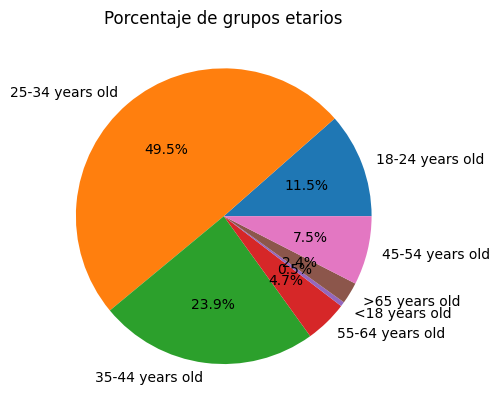

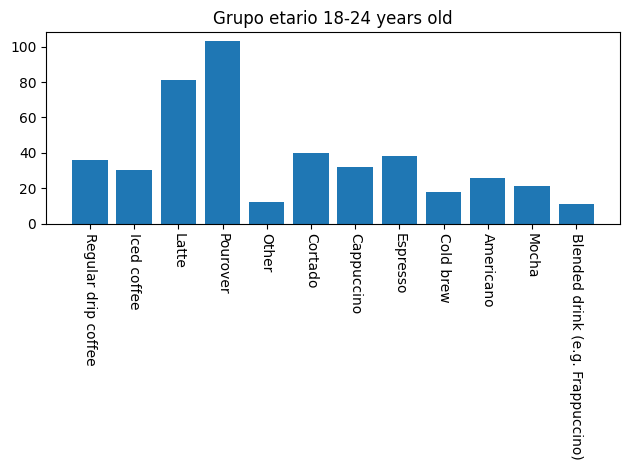

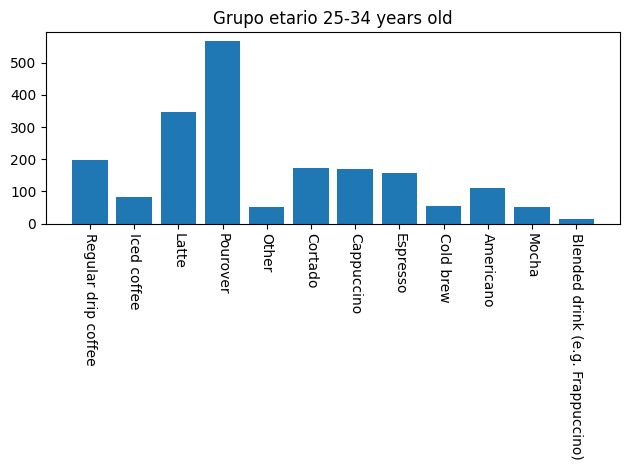

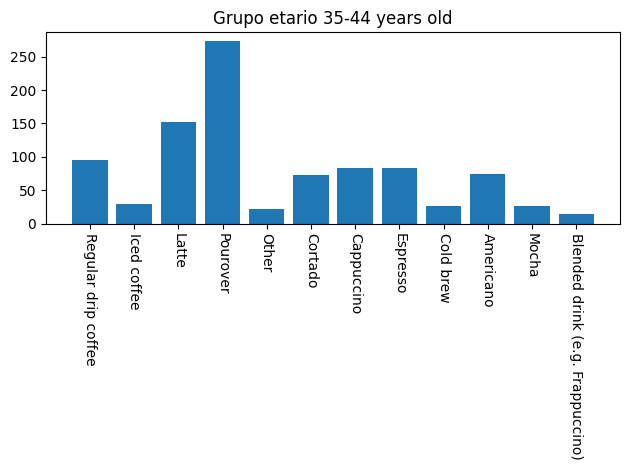

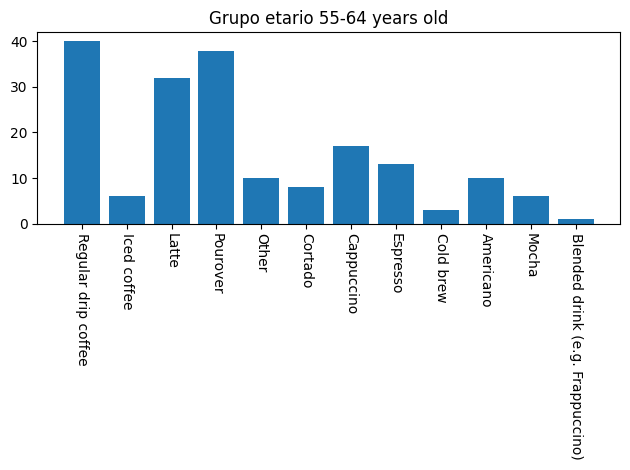

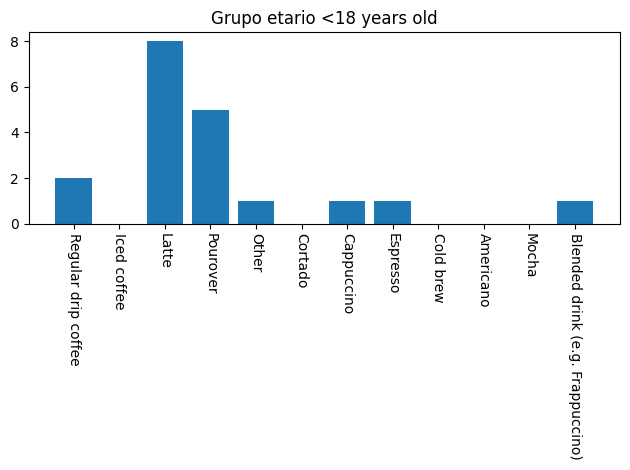

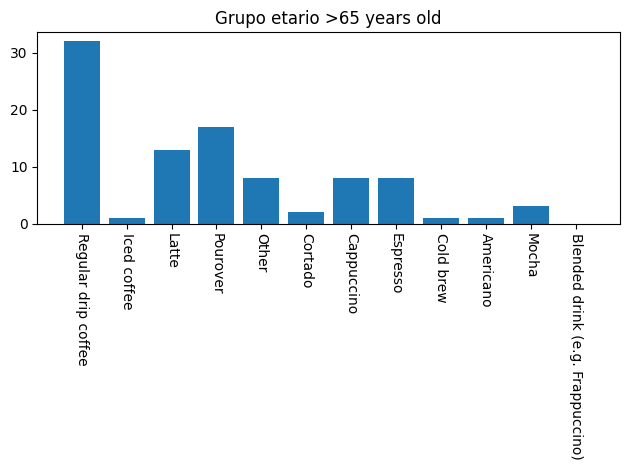

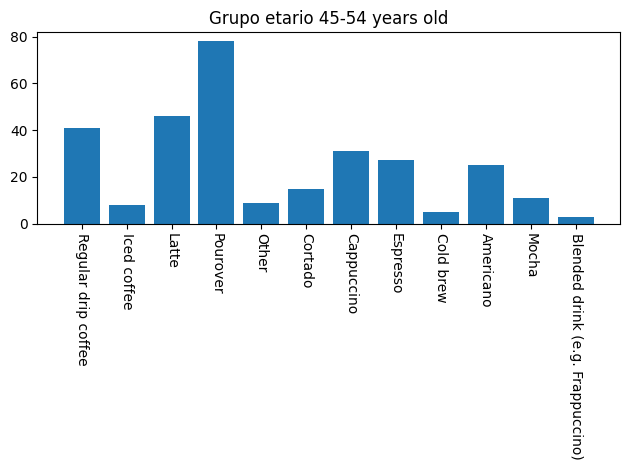

In [17]:
print(encuesta1.analizar_generos())
print(encuesta1.analizar_rangos_edades())
print(encuesta1.cantidades_generos)
print(encuesta1.calcular_maximo_nivel_educativo())
resultado = encuesta1.analizar_cafe_favorito_por_grupos_etarios()
resultado2 = encuesta1.analizar_nivel_de_tueste_por_genero()
for k,v in resultado.items():
  print(k, v)
for k,v in resultado2.items():
  print(k, v)
encuesta1.graficar_grupos_etarios()
encuesta1.graficar_cafe_favorito_por_grupos_etarios()

#podemos determinar que el grupo etario con mayor porcentaje de compras de cafe es el de 25-34 años
#seguido del de 35-44 años y en 3er puesto el de 18-24 años
#definitivamente se deberia orientarse a adultos jovenes, los cuales proporcionan mas del 70% del consumo
#y con un enfoque casi total en los 3 tipos de cafes favoritos para esas edades, los cuales son el pourover,
#latte y regular drip coffee


*Complete aquí sus conclusiones*